# Assignment- Advanced Regression Using Ridge & Lasso Regression


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### The company wants to know:

1) Which variables are significant in predicting the price of a house

2) How well those variables describe the price of a house

## Step 1 : Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# scaling the features
from sklearn.preprocessing import scale

# split into train and test
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.set_option("Display.max_columns",220)
pd.options.display.max_rows = 81

## Step 2 : Load the Dataset

In [2]:
house = pd.read_csv(r"C:\Users\Niks\Downloads\ML-2\Assignment using (Ridge & Lasso)\Austalia House Price\train.csv")

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 3 : Inspect the Dataset

In [4]:
# Let's check the dimensions of the dataframe
house.shape

(1460, 81)

In [5]:
# check the info() of dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# check the datatype of the columns
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
# let's look at the statistical aspects of the dataframe
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Step 4 : Checking Null values & Cleaning Data

In [9]:
## Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function
house.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [10]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places
round(100*(house.isnull().sum() / len(house.index)),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

### 'Id' column is also no use for our analysis So we drop the column

In [11]:
house = house.drop('Id',axis='columns')

###  Checking from data dictionary where NA is an actual data field So  Replacing NaN with None

In [12]:
house['Alley'].fillna('None', inplace=True)
house['BsmtQual'].fillna('None', inplace=True)
house['BsmtCond'].fillna('None', inplace=True)
house['BsmtExposure'].fillna('None', inplace=True)
house['BsmtFinType1'].fillna('None', inplace=True)
house['BsmtFinType2'].fillna('None', inplace=True)
house['FireplaceQu'].fillna('None', inplace=True)
house['GarageType'].fillna('None', inplace=True)
house['GarageFinish'].fillna('None', inplace=True)
house['GarageQual'].fillna('None', inplace=True)
house['GarageCond'].fillna('None', inplace=True)
house['PoolQC'].fillna('None', inplace=True)
house['Fence'].fillna('None', inplace=True)
house['MiscFeature'].fillna('None', inplace=True)

In [13]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places
round(100*(house.isnull().sum() / len(house.index)),2).sort_values(ascending=False)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
SalePrice         0.00
Foundation        0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
ExterCond         0.00
BsmtCond          0.00
BsmtQual          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
RoofStyle         0.00
YearRemodAdd      0.00
Heating           0.00
LotConfig         0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LandSlope         0.00
YearBuilt         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
TotalBsmtSF       0.00
HeatingQC         0.00
SaleCondition     0.00
ScreenPorch

In [14]:
# checking Lotfrontage info
house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [15]:
# fill missing value with mean
house['LotFrontage'].fillna((house['LotFrontage'].mean()), inplace = True)

In [16]:
house.dropna(subset=['MasVnrType'],inplace=True)
house.dropna(subset=['MasVnrArea'],inplace=True)
house.dropna(subset=['Electrical'],inplace=True)

### Convert Year to Actual number of year for Year Column
### We use the : 
#### 1) Current Year  - YearBuilt
#### 2) Current Year -  YearRemodAdd
#### 3) Current Year -  GarageYrBlt
#### 4) Current Year -  YrSold

#### So we ll get the Actual number of year to house old.

In [17]:
today = str(datetime.date.today())
currentYear = int(today[:4])

house['YearBuilt_Old'] = currentYear - house.YearBuilt
house['YearRemodAdd_Old'] = currentYear - house.YearRemodAdd
house['GarageYrBlt_Old'] = currentYear - house.GarageYrBlt
house['YrSold_Old'] = currentYear - house.YrSold

house[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old',
       'YearRemodAdd_Old','GarageYrBlt_Old','YrSold_Old']].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,2003,2003,2003.0,2008,16,16,16.0,11
1,1976,1976,1976.0,2007,43,43,43.0,12
2,2001,2002,2001.0,2008,18,17,18.0,11
3,1915,1970,1998.0,2006,104,49,21.0,13
4,2000,2000,2000.0,2008,19,19,19.0,11
5,1993,1995,1993.0,2009,26,24,26.0,10
6,2004,2005,2004.0,2007,15,14,15.0,12
7,1973,1973,1973.0,2009,46,46,46.0,10
8,1931,1950,1931.0,2008,88,69,88.0,11
9,1939,1950,1939.0,2008,80,69,80.0,11


In [18]:
house = house.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [19]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,208500,16,16,16.0,11
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,181500,43,43,43.0,12
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,223500,18,17,18.0,11
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,140000,104,49,21.0,13
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,250000,19,19,19.0,11


#### Notice imputing GarageYrBlt_Old with -1 as these house donot have garage

In [20]:
house['GarageYrBlt_Old'].fillna(-1, inplace=True)

In [21]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places
round(100*(house.isnull().sum() / len(house.index)),2).sort_values(ascending=False)

YrSold_Old          0.0
GarageYrBlt_Old     0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
ExterCond           0.0
Foundation          0.0
BsmtQual            0.0
BsmtCond            0.0
BsmtExposure        0.0
BsmtFinType1        0.0
BsmtFinSF1          0.0
BsmtFinType2        0.0
BsmtFinSF2          0.0
BsmtUnfSF           0.0
TotalBsmtSF         0.0
Heating             0.0
HeatingQC           0.0
Exterior1st         0.0
RoofMatl            0.0
RoofStyle           0.0
Utilities           0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
Street              0.0
Alley               0.0
LotShape            0.0
LandContour         0.0
LotConfig           0.0
OverallCond         0.0
LandSlope           0.0
Neighborhood        0.0
Condition1          0.0
Condition2          0.0
BldgType            0.0
HouseStyle          0.0
OverallQual         0.0
CentralAir          0.0
Electrical          0.0
1stFlrSF        

### As we seen Data is clean and there is no any missing value 

## Step 5 : Data Visualisation

### Checking Outlier

In [22]:
house.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,70.031592,10507.808408,6.093728,5.579600,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,180624.101999,47.907650,34.239835,38.321847,11.184700
std,42.350366,22.040937,9992.987081,1.381467,1.113415,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,79312.128273,30.190266,20.651334,25.823014,1.329376
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,9.000000,9.000000,-1.000000,9.000000
25%,20.000000,60.000000,7537.500000,5.000000,5.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129900.000000,19.000000,15.000000,16.000000,10.000000
50%,50.000000,70.049958,9477.000000,6.000000,5.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,162500.000000,47.000000,26.000000,35.000000,11.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,65.000000,53.000000,57.000000,12.000000
90%,120.000000,92.000000,14375.000000,8.000000,7.000000,335.00000,1064.000000,119.000000,1232.000000,1602.000000,1680.000000,954.000000,0.000000,2158.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.000000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000,95.000000,69.000000,71.000000,13.000000
95%,160.000000,104.000000,17308.500000,8.000000,8.000000,456.00000,1272.000000,398.000000,1468.000000,1749.000000,1827.000000,1141.500000,0.000000,2464.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,849.000000,335.000000,173.000000,180.000000,0.000000,160.000000,0.000000,0.000000,11.000000,325812.000000,103.000000,69.000000,89.000000,13.000000
99%,190.000000,137.500000,37802.000000,10.000000,9.000000,792.00000,1572.500000,832.000000,1797.500000,2155.500000,2212.000000,1420.000000,360.000000,3126.00000

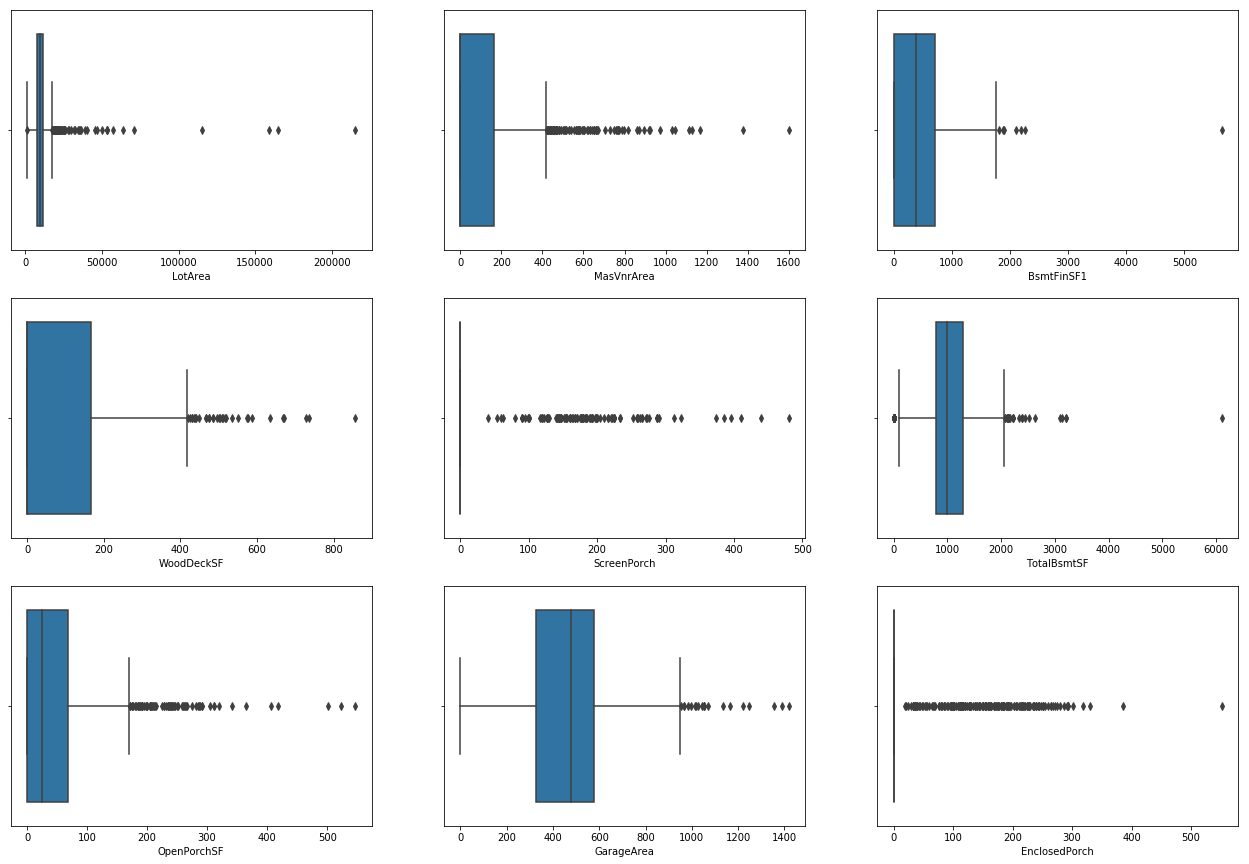

In [23]:
fig, axs = plt.subplots(figsize = (22,15))

# for LotArea
plt.subplot(3,3,1)
sns.boxplot(house['LotArea'])

# for MasVnrArea
plt.subplot(3,3,2)
sns.boxplot(house['MasVnrArea'])

# for BsmtFinSF1
plt.subplot(3,3,3)
sns.boxplot(house['BsmtFinSF1'])

# for WoodDeckSF
plt.subplot(3,3,4)
sns.boxplot(house['WoodDeckSF'])

# for ScreenPorch
plt.subplot(3,3,5)
sns.boxplot(house['ScreenPorch'])

# for TotalBsmtSF
plt.subplot(3,3,6)
sns.boxplot(house['TotalBsmtSF'])

# for OpenPorchSF
plt.subplot(3,3,7)
sns.boxplot(house['OpenPorchSF'])

# for GarageArea
plt.subplot(3,3,8)
sns.boxplot(house['GarageArea'])

# for EnclosedPorch
plt.subplot(3,3,9)
sns.boxplot(house['EnclosedPorch'])

### As We can observe there is Outlier in Dataset.
### Now we can Treat the outlier using IQR (interquartile range) method

In [24]:
# for LotArea
Q1 = house['LotArea'].quantile(0.5)
Q3 = house['LotArea'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & (house['LotArea'] <= Q3 + 1.5*IQR)]

# for MasVnrArea
Q1 = house['MasVnrArea'].quantile(0.5)
Q3 = house['MasVnrArea'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & (house['MasVnrArea'] <= Q3 + 1.5*IQR)]

# for BsmtFinSF1
Q1 = house['BsmtFinSF1'].quantile(0.5)
Q3 = house['BsmtFinSF1'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['BsmtFinSF1'] >= Q1 - 1.5*IQR) & (house['BsmtFinSF1'] <= Q3 + 1.5*IQR)]

# for ScreenPorch
Q1 = house['ScreenPorch'].quantile(0.5)
Q3 = house['ScreenPorch'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & (house['ScreenPorch'] <= Q3 + 1.5*IQR)]

# for TotalBsmtSF
Q1 = house['TotalBsmtSF'].quantile(0.5)
Q3 = house['TotalBsmtSF'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['TotalBsmtSF'] >= Q1 - 1.5*IQR) & (house['TotalBsmtSF'] <= Q3 + 1.5*IQR)]

# for OpenPorchSF
Q1 = house['OpenPorchSF'].quantile(0.5)
Q3 = house['OpenPorchSF'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['OpenPorchSF'] >= Q1 - 1.5*IQR) & (house['OpenPorchSF'] <= Q3 + 1.5*IQR)]

# for GarageArea
Q1 = house['GarageArea'].quantile(0.5)
Q3 = house['GarageArea'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['GarageArea'] >= Q1 - 1.5*IQR) & (house['GarageArea'] <= Q3 + 1.5*IQR)]

# for SalePrice
Q1 = house['EnclosedPorch'].quantile(0.5)
Q3 = house['EnclosedPorch'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['EnclosedPorch'] >= Q1 - 1.5*IQR) & (house['EnclosedPorch'] <= Q3 + 1.5*IQR)]

# for WoodDeckSF
Q1 = house['WoodDeckSF'].quantile(0.5)
Q3 = house['WoodDeckSF'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['WoodDeckSF'] >= Q1 - 1.5*IQR) & (house['WoodDeckSF'] <= Q3 + 1.5*IQR)]



In [25]:
house.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.00000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.00000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,56.953291,69.524621,9595.399858,6.067941,5.581033,97.953291,425.721161,44.346780,567.508139,1037.576079,1146.015570,341.484076,5.356688,1492.856334,0.414013,0.055909,1.552725,0.379335,2.86058,1.047417,6.484076,0.590941,1.750885,467.197452,91.787686,44.20736,21.829441,3.523001,13.400566,1.781316,41.857042,6.329087,177693.191083,47.845718,34.276008,38.234961,11.179052
std,42.183742,20.743191,3805.683724,1.357353,1.110716,164.754756,422.921694,156.163889,440.047560,397.683940,359.559143,428.318405,45.923420,488.830031,0.512453,0.235911,0.541037,0.502597,0.80874,0.222373,1.592496,0.628391,0.746242,209.353402,121.111643,60.17191,59.717370,29.794557,50.177075,33.660796,500.239761,2.696915,74740.008525,30.139388,20.703156,25.820666,1.330536
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35311.000000,9.000000,9.000000,-1.000000,9.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,793.000000,877.000000,0.000000,0.000000,1123.000000,0.000000,0.000000,1.000000,0.000000,2.00000,1.000000,5.000000,0.000000,1.000000,318.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129000.000000,19.000000,15.000000,16.000000,10.000000
50%,50.000000,70.049958,9364.000000,6.000000,5.000000,0.000000,371.000000,0.000000,483.000000,980.000000,1078.000000,0.000000,0.000000,1452.000000,0.000000,0.000000,2.000000,0.000000,3.00000,1.000000,6.000000,1.000000,2.000000,474.000000,0.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,160000.000000,47.000000,26.000000,35.000000,11.000000
75%,70.000000,78.000000,11394.000000,7.000000,6.000000,161.000000,696.000000,0.000000,806.000000,1269.000000,1368.000000,728.000000,0.000000,1761.000000,1.000000,0.000000,2.000000,1.000000,3.00000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,66.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,210000.000000,66.000000,53.000000,57.000000,12.000000
90%,120.000000,91.000000,13891.000000,8.000000,7.000000,320.000000,1024.000000,103.200000,1231.200000,1580.000000,1658.600000,931.600000,0.000000,2126.800000,1.000000,0.000000,2.000000,1.000000,4.00000,1.000000,8.000000,1.000000,3.000000,747.600000,253.000000,128.00000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,274956.000000,94.000000,69.000000,71.800000,13.000000
95%,160.000000,102.000000,16098.200000,8.000000,8.000000,436.800000,1241.200000,378.200000,1462.600000,1728.000000,1795.000000,1121.400000,0.000000,2400.000000,1.000000,1.000000,2.000000,1.000000,4.00000,1.000000,9.000000,2.000000,3.000000,840.000000,324.400000,168.00000,180.000000,0.000000,147.000000,0.000000,0.000000,11.000000,320000.000000,103.000000,69.000000,89.000000,13.000000
99%,190.000000,130.000000,21860.960000,9.000000,9.000000,745.960000,1509.040000,788.240000,1776.640000,2073.280000,2128.040000,1348.760000,233.760000,2871.520000,1.000000,1

### Lets plot some graph for the EDA purpose

Text(0,0.5,'SalePrice')

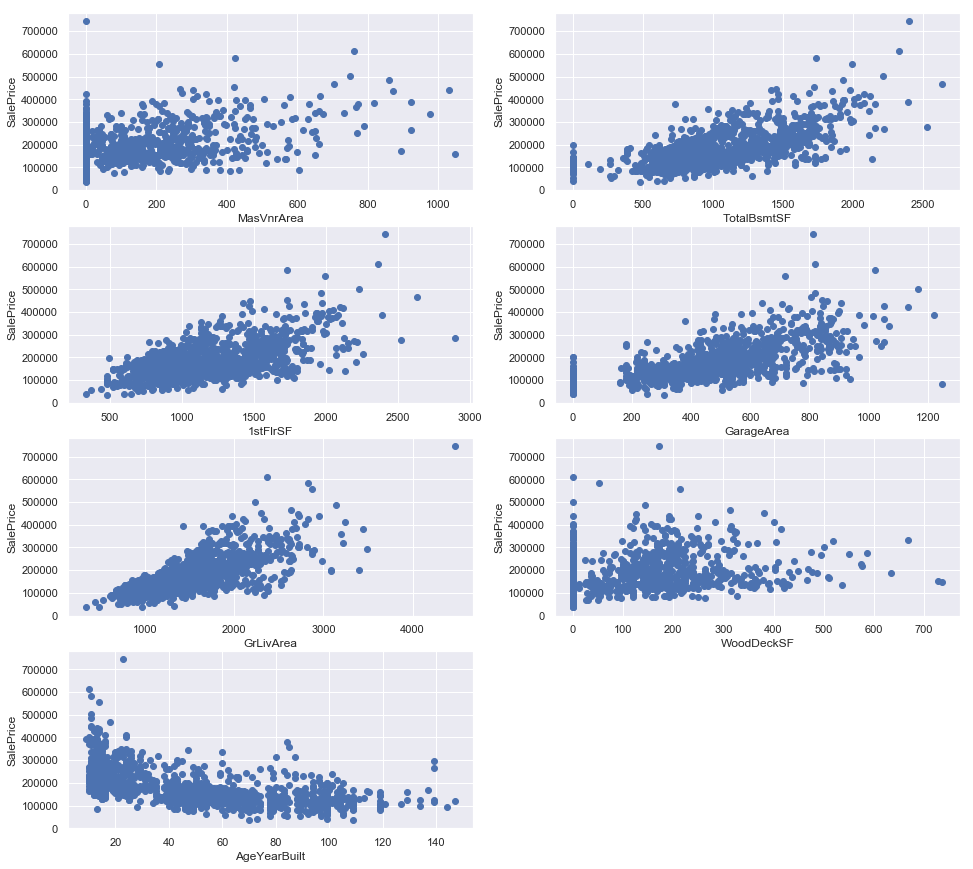

In [26]:
plt.figure(figsize=(16,15))
sns.set(style="darkgrid")

plt.subplot(4,2,1)
plt.scatter(x = "MasVnrArea", y = "SalePrice", data = house)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

plt.subplot(4,2,2)
plt.scatter(x = "TotalBsmtSF", y = "SalePrice", data = house)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.subplot(4,2,3)
plt.scatter(x = "1stFlrSF", y = "SalePrice", data = house)
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

plt.subplot(4,2,4)
plt.scatter(x = "GarageArea", y = "SalePrice", data = house)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')


plt.subplot(4,2,5)
plt.scatter(x = "GrLivArea", y = "SalePrice", data = house)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(4,2,6)
plt.scatter(x = "WoodDeckSF", y = "SalePrice", data = house)
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')

plt.subplot(4,2,7)
plt.scatter(x = "YearBuilt_Old", y = "SalePrice", data = house)
plt.xlabel('AgeYearBuilt')
plt.ylabel('SalePrice')


## Checking the Correlation between the variables

In [27]:
# All numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,16,16,16.0,11
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,43,43,43.0,12
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,18,17,18.0,11
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000,104,49,21.0,13
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000,19,19,19.0,11


In [28]:
# Correlation matrix
cor = house_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
MSSubClass,1.000000,-0.384794,-0.387832,0.044497,-0.063691,0.022024,-0.077872,-0.056186,-0.132984,-0.252027,-0.261645,0.315661,0.044450,0.088308,0.003680,-0.002798,0.141640,0.180150,-0.025434,0.291736,0.046007,-0.038633,-0.044151,-0.108678,-0.026601,0.008334,-0.009578,-0.044839,-0.026041,0.004004,-0.010960,-0.007211,-0.081111,-0.030634,-0.044534,-0.110326,0.016666
LotFrontage,-0.384794,1.000000,0.557408,0.207607,-0.044865,0.162304,0.123718,0.023540,0.132524,0.287454,0.361443,0.055101,0.006980,0.314796,0.054895,-0.021079,0.176054,0.046220,0.248093,-0.000906,0.302595,0.209687,0.277198,0.302386,0.075128,0.115238,-0.011888,0.070289,0.043459,0.060679,0.002822,0.035379,0.352404,-0.122929,-0.080422,-0.026480,-0.012785
LotArea,-0.387832,0.557408,1.000000,0.181206,-0.007167,0.128994,0.159313,0.070913,0.091981,0.299050,0.401622,0.110107,-0.010517,0.390902,0.080848,0.029322,0.185511,0.097238,0.267473,-0.014627,0.360086,0.299476,0.269229,0.307941,0.160497,0.123021,-0.010041,0.083109,0.072846,0.062538,0.050269,0.019903,0.382718,-0.065765,-0.048033,0.034752,0.022265
OverallQual,0.044497,0.207607,0.181206,1.000000,-0.104651,0.415258,0.208279,-0.071431,0.309143,0.535522,0.464216,0.279684,-0.065036,0.580406,0.098003,-0.049470,0.548670,0.265330,0.103473,-0.186656,0.412670,0.396284,0.602639,0.557911,0.239166,0.317679,-0.125550,0.034197,0.051977,0.031761,-0.031762,0.073983,0.801522,-0.590226,-0.551812,-0.387847,0.021102
OverallCond,-0.063691,-0.044865,-0.007167,-0.104651,1.000000,-0.133881,-0.025397,0.048446,-0.150451,-0.174462,-0.144349,0.014371,0.008722,-0.092765,-0.038453,0.124595,-0.209525,-0.063983,0.005096,-0.082950,-0.068638,-0.024518,-0.188384,-0.151699,-0.006579,-0.050898,0.090256,0.025373,0.051606,0.023442,0.068276,-0.005244,-0.093879,0.371953,-0.071748,0.292184,-0.042172
MasVnrArea,0.022024,0.162304,0.128994,0.415258,-0.133881,1.000000,0.218124,-0.071431,0.129798,0.347542,0.330113,0.141088,-0.069399,0.359918,0.087660,0.004386,0.258022,0.195517,0.095577,-0.034503,0.273116,0.243151,0.374286,0.380093,0.150842,0.136647,-0.107070,0.025060,0.055911,-0.023293,-0.031888,0.010161,0.479492,-0.322296,-0.178818,-0.189648,-0.008291
BsmtFinSF1,-0.077872,0.123718,0.159313,0.208279,-0.025397,0.218124,1.000000,-0.065306,-0.539535,0.440807,0.366672,-0.177329,-0.070372,0.107718,0.654002,0.062657,0.031830,-0.009737,-0.118956,-0.086242,-0.007228,0.219062,0.210903,0.259694,0.174328,0.076317,-0.121160,0.034016,0.056182,0.040895,0.002675,0.004623,0.384023,-0.249396,-0.127167,-0.096918,-0.025143
BsmtFinSF2,-0.056186,0.023540,0.070913,-0.071431,0.048446,-0.071431,-0.065306,1.000000,-0.213126,0.087404,0.087128,-0.096128,0.015689,-0.018668,0.142279,0.080924,-0.079051,-0.029667,-0.017163,-0.039141,-0.045146,0.022224,-0.049499,-0.022080,0.089076,-0.008461,0.040370,-0.029833,0.064500,0.017875,-0.001191,-0.014479,-0.033700,0.048840,0.070559,0.090673,-0.032035
BsmtUnfSF,-0.132984,0.132524,0.091981,0.309143,-0.150451,0.129798,-0.539535,-0.213126,1.000000,0.449060,0.334161,0.001997,0.025921,0.249978,-0.425397,-0.099733,0.284105,-0.042113,0.161991,0.029000,0.249723,0.058032,0.217717,0.184186,0.007874,0.129054,-0.007152,0.021127,-0.011434,-0.019933,-0.022693,0.028093,0.222075,-0.153548,-0.178306,-0.160404,0.041575
TotalBsmtSF,-0.252027,0.287454,0.299050,0.535522,-0.174462,0.347542,0.440807,0.087404,0.449060,1.000000,0.793914,-0.224120,-0.039995,0.383830,0.280663,-0.011946,0.317177,-0.068604,0.046003,-0.074995,0.250911,0.305906,0.445759,0.471311,0.229083,0.220639,-0.120909,0.047837,0.072423,0.028453,-0.022734,0.030316,0.640892,-0.415949,-0.304830,-0.244955,0.006

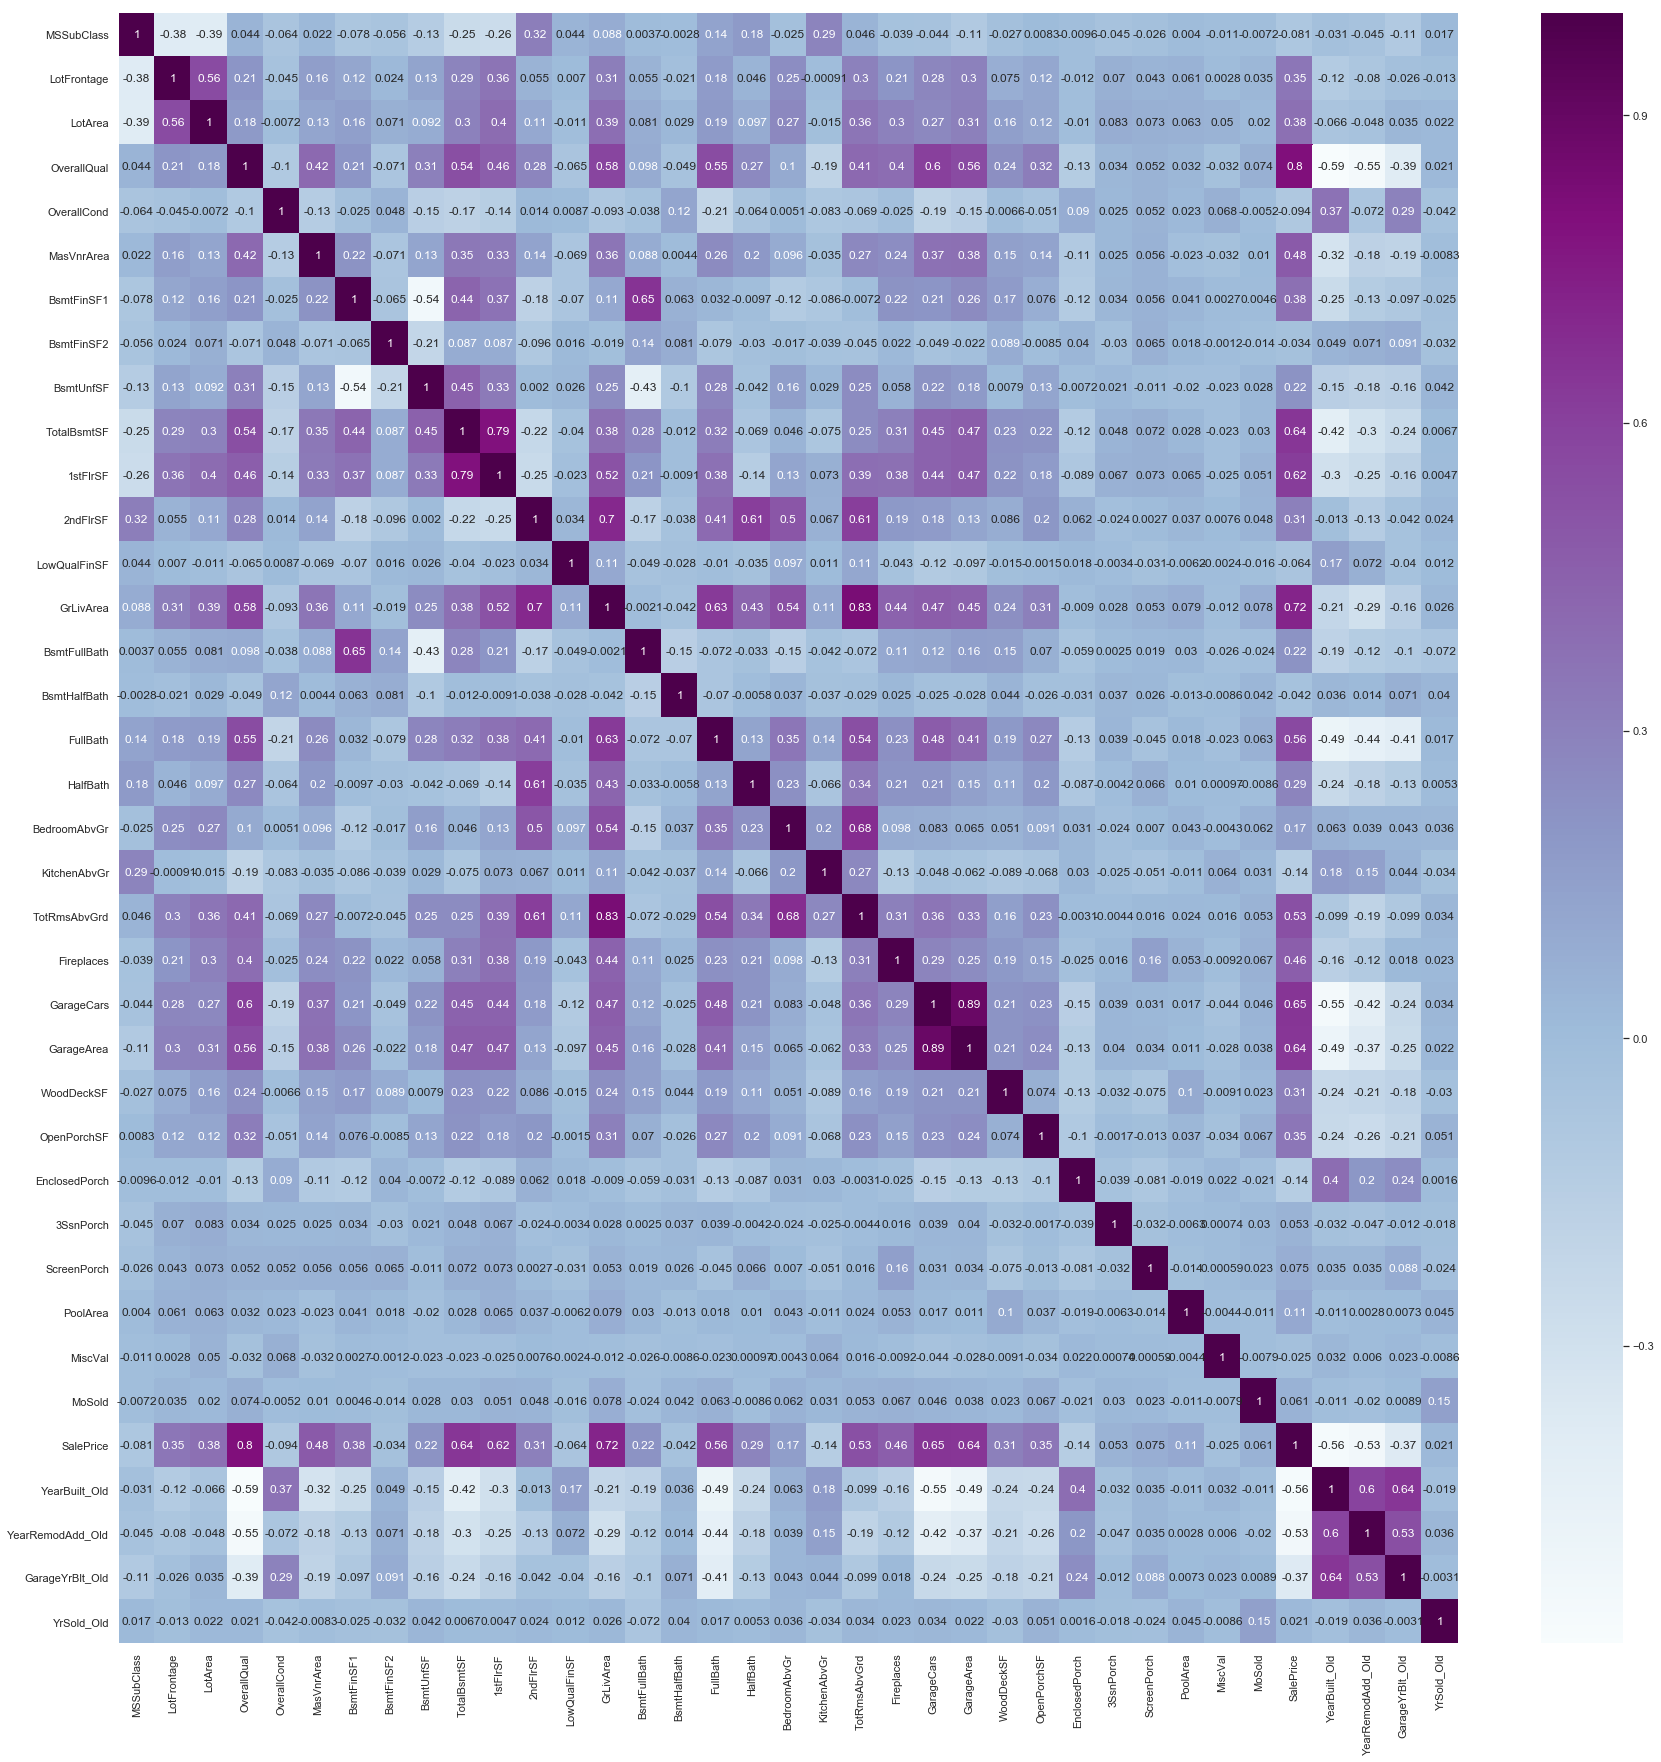

In [29]:
# Figure size
plt.figure(figsize=(30,30))
# Heatmap
sns.heatmap(cor, cmap="BuPu", annot=True)
plt.show()

### As we seen in Above Heatmap Most of the Data is not highly correlated with each other.So this is a good heatmap

## Step 6 : Create Dummy Values & Labeling Encoding

In [30]:
# Lets Create the Dummy Values for Street (Binary Value)
varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
house[varlist1] = house[varlist1].apply(binary_map)

In [31]:
# Lets Create the Dummy Values for Utilities (Binary Value)
varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
house[varlist2] = house[varlist2].apply(binary_map)

In [32]:
# Lets Create the Dummy Values for CentralAir (Binary Value)
varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
house[varlist3] = house[varlist3].apply(binary_map)

#### Now Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature 

In [33]:
def Functional1(x):
    return x.map({'Typ': 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})

def Fence1(x):
    return x.map({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "None": 0})

def rating1(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})

def rating2(x):
    return x.map({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, "None": 0})

def GarageFinish1(x):
    return x.map({'Fin': 3, "RFn": 2, "Unf": 1, "None": 0})

def LotShape1(x):
    return x.map({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})

def rating3(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, 'Unf': 1, 'None': 0})

def LandSlope1(x):
    return x.map({'Gtl': 2, "Mod": 1, "Sev": 0})


In [34]:
# Applying the function to the columns
house[['LotShape']] = house[['LotShape']].apply(LotShape1)
house[['LandSlope']] = house[['LandSlope']].apply(LandSlope1)
house[['Functional']] = house[['Functional']].apply(Functional1)
house[['Fence']] = house[['Fence']].apply(Fence1)
house[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']] = house[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']].apply(rating1)
house[['BsmtExposure']] = house[['BsmtExposure']].apply(rating2)
house[['BsmtFinType1', 'BsmtFinType2']] = house[['BsmtFinType1', 'BsmtFinType2']].apply(rating3)
house[['GarageFinish']] = house[['GarageFinish']].apply(GarageFinish1)

In [35]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,65.0,8450,1,None,3,Lvl,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,WD,Normal,208500,16,16,16.0,11
1,20,RL,80.0,9600,1,None,3,Lvl,1,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,WD,Normal,181500,43,43,43.0,12
2,60,RL,68.0,11250,1,None,2,Lvl,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,WD,Normal,223500,18,17,18.0,11
3,70,RL,60.0,9550,1,None,2,Lvl,1,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,None,0,2,WD,Abnorml,140000,104,49,21.0,13
4,60,RL,84.0,14260,1,None,2,Lvl,1,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,WD,Normal,250000,19,19,19.0,11


In [36]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPor

### Before Moving to Create Dummy Values We have to make ' MSSubClass ' to Object

In [37]:
house['MSSubClass'] = house['MSSubClass'].astype('object')

## Data Preparation

In [38]:
# split into X and y
X = house.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley','LotShape', 'LandContour', 'Utilities', 
               'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','OverallQual', 
               'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 
               'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinSF1', 'BsmtFinType2', 
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
               '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 
               'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
               'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond','PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
               'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal','MoSold',
               'SaleType', 'SaleCondition', 'YearBuilt_Old','YearRemodAdd_Old', 'GarageYrBlt_Old', 'YrSold_Old']]
y = house['SalePrice']

### Create Dummy  Values for Categorical Variable

In [39]:
# Subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])

In [40]:
house_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
# Convert categorical into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)

In [42]:
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,

In [43]:
house_dummies.shape

(1413, 156)

In [44]:
# Drop categorical variable columns
X = X.drop(list(house_categorical.columns), axis=1)

In [45]:
# Concatenate dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [46]:
X.shape

(1413, 212)

In [47]:
X.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,1,3,1,2,7,5,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,2,2,548,3,3,0,61,0,0,0,0,0,0,0,2,16,16,16.0,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1,3,1,2,6,8,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,2,2,460,3,3,298,0,0,0,0,0,0,0,0,5,43,43,43.0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Step 7 : Scaling the Data

In [48]:
# storing column names in cols
colss = X.columns

# Scale the data using Scale method
X = pd.DataFrame(scale(X))
X.columns = colss

In [49]:
X.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.218203,-0.301077,0.053281,0.696321,0.026612,0.209309,0.686918,-0.523301,0.595318,1.092177,-0.230584,0.595606,0.124118,-0.577900,1.174915,0.662955,-0.272693,-0.284076,-0.949115,-0.456746,0.895392,0.265433,-0.806872,1.197001,-0.116685,0.444368,1.14390,-0.237078,0.826993,1.235353,0.172452,-0.213307,0.756124,0.952254,0.232852,-0.940737,-0.988639,0.336795,0.333945,0.386099,0.267944,0.268808,-0.758145,0.279177,-0.365675,-0.118285,-0.26716,-0.052938,-0.051159,-0.474115,-0.083704,-1.605768,-1.056989,-0.883077,-0.861435,-0.134619,-0.22485,-0.053281,-0.092549,-0.33294,1.985084,-0.210585,-0.096362,-0.203144,-0.119823,-0.195467,-0.254574,-0.214224,-0.084425,-0.139573,-0.210585,-0.107019,0.51917

## Step 8 : Model Building and Evaluation

###  Split into Train and Test 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

## Ridge and Lasso Regression

Let's now try predicting House prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

###  1) Ridge Regression

In [51]:
# list of alphas to tune
list_alpha = [0.1, 0.5, 1.0, 5.0, 20, 
 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
params = {'alpha': list_alpha}

In [52]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009408,0.001200,0.000999,0.000001,0.1,{'alpha': 0.1},-19161.281207,-18161.983958,-17811.321332,-18919.554314,-17734.052722,-18358.269228,580.849619,26,-12479.613288,-12600.396670,-12490.806791,-12380.226400,-12522.088358,-12494.626301,71.089876
1,0.008807,0.000980,0.000600,0.000490,0.5,{'alpha': 0.5},-19115.771708,-18044.567208,-17867.954382,-18657.496182,-17713.162689,-18280.363364,526.746686,25,-12486.061126,-12604.859577,-12496.581713,-12408.455828,-12535.622309,-12506.316111,64.267139
2,0.008007,0.000633,0.000600,0.000490,1,{'alpha': 1.0},-19064.333314,-17980.555337,-17846.451712,-18471.094517,-17681.956898,-18209.411138,502.307044,24,-12493.643932,-12606.503459,-12505.409456,-12432.014292,-12546.184982,-12516.751224,57.904646
3,0.009408,0.002156,0.000599,0.000489,5,{'alpha': 5.0},-18784.091621,-17788.909538,-17679.113774,-18025.529527,-17469.787306,-17949.971388,454.141878,23,-12543.134260,-12617.533793,-12575.926762,-12516.930331,-12591.244813,-12568.953992,35.436188
4,0.010808,0.001469,0.000600,0.000490,20,{'alpha': 20},-18338.363481,-17537.532016,-17409.291427,-17574.793849,-17087.576609,-17590.018994,411.751923,22,-12642.317300,-12693.646786,-12741.406342,-12693.461498,-12757.692594,-12705.704904,40.720020


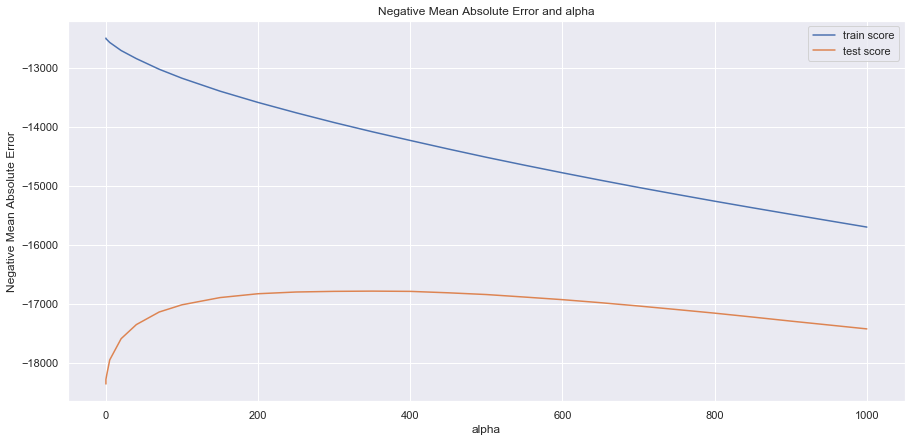

In [54]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(15,7))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [55]:
# Checking best parameter (alpha)
model_cv.best_params_

{'alpha': 350}

In [56]:
alpha = 350
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

ridge.coef_

array([ 1.61494510e+03,  3.26320108e+03,  5.62644568e+02, -7.72047279e+02,
        5.69329391e-29, -1.73350387e+02,  7.96559984e+03,  3.12148957e+03,
        4.46007863e+03,  3.92779144e+03, -7.24571203e+02,  2.48421438e+03,
       -8.18209658e+02,  2.78337844e+03,  1.70380677e+03,  5.45255870e+03,
       -3.68275003e+01,  9.19265074e+02, -4.60323267e+02,  5.65020865e+03,
        1.57661721e+03,  3.04116292e+02,  6.80268329e+03,  4.03360797e+03,
       -2.81605187e+02,  8.51155407e+03,  1.67197200e+03, -6.81844587e+02,
        2.46590738e+03,  2.49804407e+03, -5.87349519e+02, -2.02949133e+03,
        3.82794496e+03,  4.16937249e+03,  2.88320772e+03,  2.35746362e+03,
        1.29855440e+03,  1.01194576e+03,  3.01511489e+03,  3.72618112e+03,
       -2.70839961e+02, -1.79400431e+02,  1.32134286e+03,  1.93607425e+03,
       -3.31562364e+02,  5.37811149e+02,  4.58079323e+02,  8.30764764e+02,
        5.59329460e+03, -3.26363009e+02,  1.96283145e+02, -3.95082423e+02,
       -1.99137410e+03, -

In [57]:
# predict the R-square value
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9237525324494041
0.8927193726802971


In [58]:
# mean square error value
mse = np.mean((y_test_pred - y_test)**2)
mse

607246787.3338201

In [59]:
# Ridge Regression Score
ridge.score(X_test,y_test)

0.8927193726802971

In [60]:
# get the important Coefficent values with Columns name
coefs = pd.Series(ridge.coef_,index=X_train.columns).sort_values()
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print(abs(imp_coefs))

KitchenAbvGr            2029.491328
YearBuilt_Old           1991.374104
Neighborhood_NAmes      1963.148448
YearRemodAdd_Old        1954.842350
RoofMatl_Tar&Grv        1908.630285
MSSubClass_160          1767.454404
Neighborhood_Mitchel    1656.401028
BldgType_TwnhsE         1606.658308
Neighborhood_NWAmes     1523.378446
BldgType_Twnhs          1504.287843
2ndFlrSF                4033.607966
TotRmsAbvGrd            4169.372491
MasVnrArea              4460.078627
Neighborhood_NridgHt    5037.926311
BsmtFinSF1              5452.558699
PoolQC                  5593.294603
TotalBsmtSF             5650.208652
1stFlrSF                6802.683293
OverallQual             7965.599837
GrLivArea               8511.554067
dtype: float64


## 2) Lasso Regression

In [61]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   11.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.226751,0.007869,0.000800,0.00040,0.1,{'alpha': 0.1},-19377.332238,-18112.102604,-17939.631091,-18903.173816,-17745.742808,-18416.273815,621.241270,26,-12484.178766,-12603.091052,-12490.776302,-12379.083269,-12524.095096,-12496.244897,72.241371
1,0.228952,0.008066,0.000600,0.00049,0.5,{'alpha': 0.5},-19327.794019,-18054.676148,-17939.655474,-18890.699687,-17737.394987,-18390.703971,611.725407,25,-12484.983112,-12604.024663,-12491.734860,-12381.030834,-12525.688459,-12497.492386,71.968144
2,0.225150,0.007673,0.000601,0.00049,1,{'alpha': 1.0},-19300.421859,-18018.548751,-17940.156186,-18874.662496,-17726.962558,-18372.802734,606.940325,24,-12485.927954,-12604.960811,-12492.871579,-12383.491836,-12527.635730,-12498.977582,71.551755
3,0.228352,0.012728,0.000800,0.00040,5,{'alpha': 5.0},-19251.325946,-17878.350287,-17947.643326,-18736.735319,-17665.203352,-18296.489309,600.065182,23,-12492.915319,-12612.942072,-12501.385838,-12404.013466,-12544.791373,-12511.209614,68.409692
4,0.219145,0.004943,0.000400,0.00049,20,{'alpha': 20},-19011.997207,-17672.755522,-17766.932306,-18118.292967,-17396.799586,-17993.958709,559.097597,22,-12505.810701,-12624.857600,-12555.570696,-12478.534965,-12588.793850,-12550.713562,53.286124


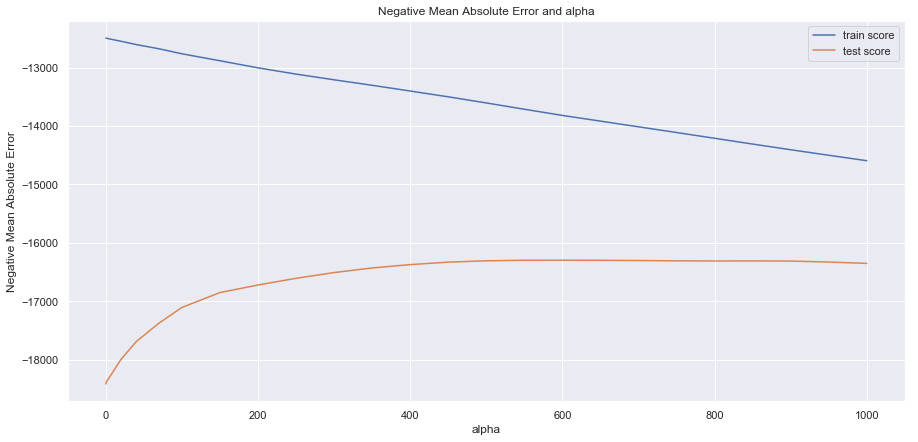

In [63]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(15,7))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [64]:
# Checking best parameter (alpha)
model_cv.best_params_

{'alpha': 600}

In [65]:
#It is confirmed by graph as well
alpha = 600
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 4.09249926e+02,  3.54578915e+03,  1.15181964e+02, -5.03489887e+02,
        0.00000000e+00, -0.00000000e+00,  1.30012631e+04,  3.65162320e+03,
        4.64598899e+03,  4.16436979e+03, -4.83637808e+02,  0.00000000e+00,
       -2.56021039e+02,  2.49716287e+03,  0.00000000e+00,  8.38500482e+03,
        0.00000000e+00,  7.13344388e+02, -0.00000000e+00,  5.54515164e+03,
        7.82252146e+02, -0.00000000e+00,  1.71929907e+03,  0.00000000e+00,
       -6.17663599e+02,  2.46339926e+04,  9.42770029e+02, -8.18538724e+01,
        0.00000000e+00,  1.50343444e+03, -2.29527436e+03, -3.84248730e+03,
        3.24644397e+03,  1.17511741e+03,  3.74856605e+03,  1.55571146e+03,
        0.00000000e+00,  0.00000000e+00,  2.08376855e+03,  2.82536222e+03,
       -0.00000000e+00, -0.00000000e+00,  5.37660294e+02,  1.03108195e+03,
       -2.78563424e+01,  0.00000000e+00,  0.00000000e+00, -1.36798706e+03,
        8.55239157e+03, -1.15590023e+02,  0.00000000e+00, -2.97431921e+02,
       -4.72320942e+03, -

In [66]:
# predict the R-square value
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9279886582921424
0.8921817786022427


In [67]:
# mean square error value
mse = np.mean((y_test_pred - y_test)**2)
mse

610289762.4258223

In [68]:
# Ridge Regression Score
lasso.score(X_test,y_test)

0.8921817786022427

In [69]:
# get the important Coefficent values with Columns name
coefs = pd.Series(lasso.coef_,index=X_train.columns).sort_values()
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print(abs(imp_coefs))

YearBuilt_Old            4723.209424
KitchenAbvGr             3842.487298
BedroomAbvGr             2295.274360
MSSubClass_160           2286.742349
RoofMatl_Tar&Grv         2201.986830
MasVnrType_BrkFace       1881.428751
MSSubClass_120           1580.145396
BldgType_TwnhsE          1512.622018
BldgType_Twnhs           1505.775562
PoolArea                 1367.987065
Functional               3748.566047
ExterQual                4164.369790
MasVnrArea               4645.988986
TotalBsmtSF              5545.151639
SaleType_New             5553.556217
Neighborhood_NridgHt     6900.923880
BsmtFinSF1               8385.004819
PoolQC                   8552.391574
OverallQual             13001.263080
GrLivArea               24633.992608
dtype: float64


# Conclusion : 

## I analysed both Ridge & Lasso Regression models.Both models are giving very good R-Square score.

## I will Consider  Lasso Regression as Final Model.

## SO TOP 5 FEAUTURES FROM LASSO MODELS WOULD BE:

### 1)   YearBuilt_Old            
### 2)   KitchenAbvGr            
### 3)   BedroomAbvGr             
### 4)   MSSubClass_160           
### 5)   RoofMatl_Tar&Grv        


### Best alpha value for Lasso : ( 'alpha': 600 )

### Best alpha value for Ridge : ( 'alpha': 350 )

# Subjective Question : 

## Question 1 : 
### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


#### Now lets perform the Ridge and lasso Regrssion with Double the Alpha Value

#### 1) Ridge Regression alpha = 700

In [70]:
alpha = 700
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.78493507e+03,  2.91793963e+03,  5.07847882e+02, -8.91054382e+02,
        2.94873764e-29, -1.54408886e+02,  6.72257357e+03,  2.28075320e+03,
        3.84126617e+03,  3.93937969e+03, -4.09531482e+02,  2.43135254e+03,
       -3.89873853e+02,  2.61391188e+03,  1.83565917e+03,  4.65678173e+03,
        4.30258383e+01,  6.47291147e+02, -1.56092903e+02,  5.03376933e+03,
        1.64804613e+03,  4.11493834e+02,  5.89513776e+03,  3.26407089e+03,
       -2.65461068e+02,  7.17124812e+03,  1.73876986e+03, -6.34726732e+02,
        2.59239116e+03,  2.17800844e+03,  8.16165219e+01, -1.49388777e+03,
        3.92234292e+03,  4.00043618e+03,  2.12680650e+03,  2.54684951e+03,
        1.94450461e+03,  1.34733741e+03,  2.99806835e+03,  3.53148210e+03,
       -3.30690978e+01,  7.85337520e-01,  1.41232665e+03,  1.93477415e+03,
       -2.95835302e+02,  4.41371039e+02,  4.43551028e+02,  1.45755934e+03,
        4.29168027e+03, -3.07348285e+02,  1.61278305e+02, -1.81422664e+02,
       -1.65317016e+03, -

In [71]:
# get the important Coefficent values with Columns name
coefs = pd.Series(ridge.coef_,index=X_train.columns).sort_values()
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print(abs(imp_coefs))

YearRemodAdd_Old        2069.146003
YearBuilt_Old           1653.170164
Neighborhood_NAmes      1636.974905
RoofStyle_Gable         1537.336869
KitchenAbvGr            1493.887769
MSSubClass_160          1418.538767
RoofMatl_Tar&Grv        1403.755757
BldgType_TwnhsE         1385.384851
Neighborhood_Gilbert    1329.938752
Neighborhood_Mitchel    1293.012918
KitchenQual             3922.342919
ExterQual               3939.379688
TotRmsAbvGrd            4000.436177
Neighborhood_NridgHt    4267.825075
PoolQC                  4291.680270
BsmtFinSF1              4656.781733
TotalBsmtSF             5033.769328
1stFlrSF                5895.137762
OverallQual             6722.573565
GrLivArea               7171.248124
dtype: float64


#### 2) Lasso Regression alpha = 1200

In [72]:
#It is confirmed by graph as well
alpha = 1200
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([  164.22293494,  3502.44912738,     0.        ,  -352.66944626,
           0.        ,    -0.        , 13973.45729033,  2314.77961526,
        3687.47205239,  5282.36287781,    -0.        ,     0.        ,
          -0.        ,  2316.65282379,     0.        ,  8251.71143037,
           0.        ,    43.96584243,    -0.        ,  5274.61154106,
         816.57837876,    -0.        ,  1491.32008435,     0.        ,
        -499.41625891, 24554.8029732 ,   514.86513927,    -0.        ,
           0.        ,   949.52615503,  -924.94886488, -3271.41990823,
        3903.03170674,     0.        ,  3041.4875126 ,  1794.55163274,
           0.        ,     0.        ,  1874.52013008,  3208.72827632,
          -0.        ,    -0.        ,   277.62118477,   701.8083826 ,
          -0.        ,     0.        ,     0.        ,    -0.        ,
        6389.36337699,    -0.        ,     0.        ,    -0.        ,
       -3408.56216998, -1540.61230961,    -0.        ,    -0.        ,
      

In [73]:
# predict the R-square value
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9164603105459078
0.8859043718030118


In [74]:
# mean square error value
mse = np.mean((y_test_pred - y_test)**2)
mse

645822133.990547

In [75]:
# Ridge Regression Score
lasso.score(X_test,y_test)

0.8859043718030118

In [76]:
# get the important Coefficent values with Columns name
coefs = pd.Series(lasso.coef_,index=X_train.columns).sort_values()
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print(abs(imp_coefs))

YearBuilt_Old            3408.562170
KitchenAbvGr             3271.419908
MSSubClass_160           1968.331916
YearRemodAdd_Old         1540.612310
MSZoning_RM              1287.297386
MasVnrType_BrkFace       1258.865734
RoofMatl_Tar&Grv         1210.647724
MSSubClass_120           1123.533391
BedroomAbvGr              924.948865
Heating_OthW              886.341205
MasVnrArea               3687.472052
KitchenQual              3903.031707
SaleType_New             4828.257369
TotalBsmtSF              5274.611541
ExterQual                5282.362878
Neighborhood_NridgHt     6075.166861
PoolQC                   6389.363377
BsmtFinSF1               8251.711430
OverallQual             13973.457290
GrLivArea               24554.802973
dtype: float64


## Question 3

### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [77]:
# Copy original data to another data
house1 = house.copy()

In [78]:
house1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,65.0,8450,1,None,3,Lvl,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,WD,Normal,208500,16,16,16.0,11
1,20,RL,80.0,9600,1,None,3,Lvl,1,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,WD,Normal,181500,43,43,43.0,12
2,60,RL,68.0,11250,1,None,2,Lvl,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,WD,Normal,223500,18,17,18.0,11
3,70,RL,60.0,9550,1,None,2,Lvl,1,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,None,0,2,WD,Abnorml,140000,104,49,21.0,13
4,60,RL,84.0,14260,1,None,2,Lvl,1,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,WD,Normal,250000,19,19,19.0,11


#### step 1 :  We will Drop Top 5 Feature From Lasso Regression into the original Dataset 

In [79]:
house1.drop(['YearBuilt_Old','KitchenAbvGr','BedroomAbvGr','MSSubClass','RoofMatl'],axis =1,inplace=True)
house1.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,RL,65.0,8450,1,None,3,Lvl,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,4,8,7,0,0,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,WD,Normal,208500,16,16.0,11
1,RL,80.0,9600,1,None,3,Lvl,1,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,6,7,1,3,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,WD,Normal,181500,43,43.0,12
2,RL,68.0,11250,1,None,2,Lvl,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,4,6,7,1,3,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,WD,Normal,223500,17,18.0,11
3,RL,60.0,9550,1,None,2,Lvl,1,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,4,7,7,1,4,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,None,0,2,WD,Abnorml,140000,49,21.0,13
4,RL,84.0,14260,1,None,2,Lvl,1,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,9,7,1,3,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,WD,Normal,250000,19,19.0,11


#### Step 2 : Data Preparation

In [80]:
house1.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 

In [81]:
# split into X and y
X = house1.loc[:, ['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape','LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Neighborhood','Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual','OverallCond',
                  'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType','MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
                  'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
                  'TotalBsmtSF', 'Heating','HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 
                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
                  'Fireplaces','FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea','GarageQual', 'GarageCond',
                  'PavedDrive', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
                  'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType','SaleCondition', 'YearRemodAdd_Old', 'GarageYrBlt_Old',
                  'YrSold_Old']]
y = house1['SalePrice']

### Step 3 : Create Dummy  Values for Categorical Variable

In [82]:
# Subset all categorical variables
house1_categorical = X.select_dtypes(include=['object'])

In [83]:
house1_categorical.columns

Index(['MSZoning', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [84]:
# Convert categorical into dummies
house1_dummies = pd.get_dummies(house1_categorical, drop_first=True)

In [85]:
house1_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [86]:
# Drop categorical variable columns
X = X.drop(list(house1_categorical.columns), axis=1)

In [87]:
# Concatenate dummy variables with X
X = pd.concat([X, house1_dummies], axis=1)

In [88]:
X.shape

(1413, 190)

In [89]:
X.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,1,3,1,2,7,5,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,4,8,7,0,0,2,2,548,3,3,0,61,0,0,0,0,0,0,0,2,16,16.0,11,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1,3,1,2,6,8,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,6,7,1,3,2,2,460,3,3,298,0,0,0,0,0,0,0,0,5,43,43.0,12,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,1,2,1,2,7,5,162.0,4,3,4,3,2,6,486,1,0,434,920,5,1,920,866,0,1786,1,0,2,1,4,6,7,1,3,2,2,608,3,3,0,42,0,0,0,0,0,0,0,9,17,18.0,11,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0

### Step 4 : Scaling the Data

In [90]:
# storing column names in cols
colss1 = X.columns

# Scale the data using Scale method
X = pd.DataFrame(scale(X))
X.columns = colss1

In [91]:
X.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.218203,-0.301077,0.053281,0.696321,0.026612,0.209309,0.686918,-0.523301,0.595318,1.092177,-0.230584,0.595606,0.124118,-0.577900,1.174915,0.662955,-0.272693,-0.284076,-0.949115,-0.456746,0.895392,0.265433,-0.806872,1.197001,-0.116685,0.444368,1.14390,-0.237078,0.826993,1.235353,0.756124,0.952254,0.232852,-0.940737,-0.988639,0.336795,0.333945,0.386099,0.267944,0.268808,-0.758145,0.279177,-0.365675,-0.118285,-0.26716,-0.052938,-0.051159,-0.474115,-0.083704,-1.605768,-0.883077,-0.861435,-0.134619,-0.210585,-0.107019,0.519174,-0.423634,0.256146,-0.166242,-0.187523,-0.134207,0.319662,-0.254574,-0.183440,-0.053281,0.617440,-0.037649,-0.107019,-0.206892,-0.119823,2.912597,-0.191530,-0.272992,-0.240072,-0.16169,-0.110352,-0.187523,-0.431738,-0.080064,-0.231714,-0.161690,-0.233404,-0.290552,-0.134207,-0.233404,-0.205025,-0.246598,-0.131448,-0.154638,-0.084425,-0.243352,0.397740,-0.075458,-0.113592,-0.088577,-0.134207,-0.037649,-0.059591,-0.065302,0.096362,-0.026612,-0.026612,-0.026612,-0.037649,-0.142185,-

## Step 5 : Model Building and Evalution

### Split Data into Train and Test

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)


### Lasso Model

In [93]:
# list of alphas to tune
list_alpha = [0.1, 0.5, 1.0, 5.0, 20, 
 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
params = {'alpha': list_alpha}


In [94]:
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   10.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [95]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.208939,0.011930,0.001000,0.000002,0.1,{'alpha': 0.1},-19594.117425,-17843.476990,-17326.109921,-19112.860926,-17693.682420,-18314.676803,878.742996,24,-12815.553885,-12927.307949,-13001.473420,-12706.785588,-12929.440121,-12876.112193,103.459285
1,0.217545,0.009207,0.000801,0.000401,0.5,{'alpha': 0.5},-19561.825045,-17930.150303,-17325.987400,-19100.519022,-17690.335008,-18322.401807,859.017674,26,-12816.027938,-12928.366258,-13002.134554,-12708.679031,-12929.882791,-12877.018114,103.095371
2,0.218546,0.010354,0.000601,0.000490,1,{'alpha': 1.0},-19534.333316,-17960.092439,-17326.427713,-19083.228013,-17686.253511,-18318.705839,845.819451,25,-12816.753797,-12929.488732,-13002.875906,-12710.780423,-12930.476415,-12878.075055,102.676493
3,0.216744,0.009858,0.000601,0.000490,5,{'alpha': 5.0},-19498.956446,-17808.105920,-17330.048108,-18938.228051,-17648.985718,-18245.467355,829.203925,23,-12822.947107,-12937.791628,-13011.708277,-12729.093165,-12936.291351,-12887.566306,99.596505
4,0.213742,0.012980,0.000600,0.000490,20,{'alpha': 20},-19305.119663,-17633.081970,-17133.459662,-18277.619534,-17509.721608,-17972.267706,762.126215,22,-12827.704706,-12975.238815,-13029.170402,-12798.001317,-12937.381894,-12913.499427,87.706837


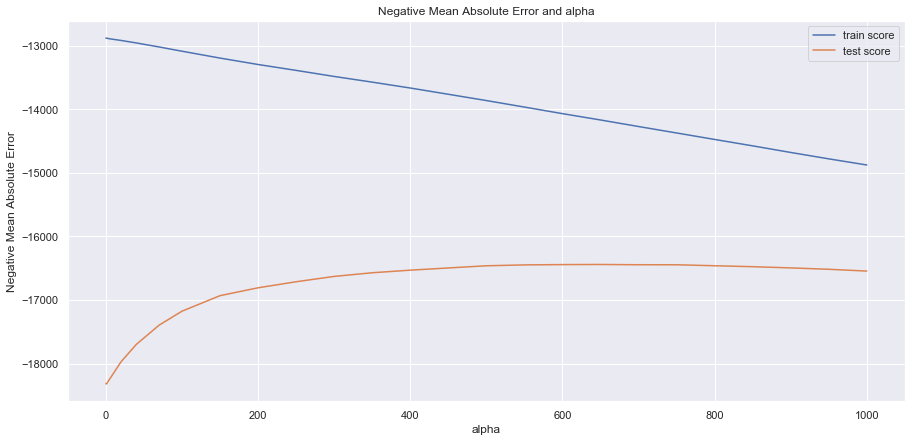

In [96]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(15,7))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [97]:

# Checking best parameter (alpha)
model_cv.best_params_

{'alpha': 650}

In [98]:
#It is confirmed by graph as well
alpha = 650
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 1.80978897e+02,  3.36564199e+03,  0.00000000e+00, -5.67932523e+02,
        0.00000000e+00, -0.00000000e+00,  1.38071522e+04,  3.02503140e+03,
        4.40920889e+03,  4.47289036e+03, -7.21692978e+02,  7.45764620e+02,
       -4.61848682e+02,  2.66853610e+03,  2.82476752e+01,  8.68059600e+03,
        0.00000000e+00,  7.13975023e+02, -0.00000000e+00,  5.39554203e+03,
        1.14251744e+03, -0.00000000e+00,  2.01091186e+03,  0.00000000e+00,
       -4.35097364e+02,  2.24947472e+04,  9.96021565e+02, -2.18017362e+02,
        0.00000000e+00,  1.90742234e+03,  3.62996770e+03,  0.00000000e+00,
        4.08595064e+03,  1.91132005e+03,  0.00000000e+00,  1.74750082e+02,
        2.33376963e+03,  3.03080034e+03, -0.00000000e+00, -0.00000000e+00,
        5.79099073e+02,  1.02155200e+03, -3.58704201e+02,  0.00000000e+00,
        0.00000000e+00, -1.55075404e+03,  8.25515157e+03, -4.15652902e+01,
        0.00000000e+00, -4.28131316e+02, -2.13840504e+03, -5.10165686e+02,
       -0.00000000e+00,  

In [99]:
# predict the R-square value
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9242776177640903
0.8891220415470041


In [100]:
# mean square error value
mse = np.mean((y_test_pred - y_test)**2)
mse

627608970.4068016

In [101]:
# Ridge Regression Score
lasso.score(X_test,y_test)

0.8891220415470041

In [102]:
# get the important Coefficent values with Columns name
coefs = pd.Series(lasso.coef_,index=X_train.columns).sort_values()
imp_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print(abs(imp_coefs))


BldgType_TwnhsE          3030.151698
BldgType_Duplex          2671.577005
BldgType_Twnhs           2507.653624
YearRemodAdd_Old         2138.405041
PoolArea                 1550.754036
MSZoning_RM              1511.278159
MasVnrType_BrkFace       1421.375462
Neighborhood_OldTown     1374.305702
Heating_OthW             1187.388968
HouseStyle_2.5Fin        1067.250856
Functional               4085.950641
MasVnrArea               4409.208888
ExterQual                4472.890360
TotalBsmtSF              5395.542033
SaleType_New             5982.618278
Neighborhood_NridgHt     6886.012779
PoolQC                   8255.151573
BsmtFinSF1               8680.595996
OverallQual             13807.152225
GrLivArea               22494.747159
dtype: float64
